# Data Cleaning Notebook
This notebook covers the data cleaning process for the housing dataset. Steps include loading the data, inspecting for missing values, handling outliers, and preparing the data for modeling.

In [19]:
# Import required libraries
import pandas as pd
import numpy as np

# Load the training data
Load the training data from the raw data folder.

In [20]:
# Load the training data
train_df = pd.read_csv('../../data/raw/train.csv')
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Inspect Missing Values
Check for missing values in the dataset to identify columns that need cleaning or imputation.

In [21]:
# Display missing value counts
missing = train_df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

## Handle Missing Values
Decide on strategies for handling missing values (e.g., imputation, removal) based on the data and domain knowledge.

In [22]:
# Fill missing numerical values with median
num_cols = train_df.select_dtypes(include=[np.number]).columns
train_df[num_cols] = train_df[num_cols].fillna(train_df[num_cols].median())

# Fill missing categorical values with mode
cat_cols = train_df.select_dtypes(include=['object']).columns
for col in cat_cols:
    train_df[col] = train_df[col].fillna(train_df[col].mode()[0])

In [26]:
# Convert categorical columns to numerical using label encoding
for col in cat_cols:
    train_df[col] = train_df[col].astype('category').cat.codes

## Detect and Handle Outliers
Visualize and handle outliers as needed.

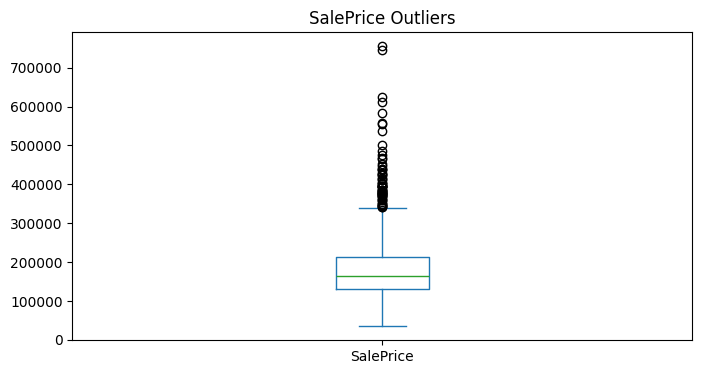

In [27]:
# Visualize outliers in 'SalePrice'
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
train_df['SalePrice'].plot(kind='box')
plt.title('SalePrice Outliers')
plt.show()

## Save Cleaned Data
Export the cleaned dataset for further analysis or modeling.

In [28]:
# Save cleaned data
import os
os.makedirs('../../data/processed/V1', exist_ok=True)
train_df.to_csv('../../data/processed/V1/train_cleaned.csv', index=False)